# Audio Processing

Audio processing refers to the manipulation and analysis of audio signals using various techniques and algorithms. It involves the modification, enhancement, or extraction of audio information for a wide range of applications, including music production, speech recognition, audio synthesis, noise reduction, audio effects, and more.

In [2]:
import numpy as np
from scipy.io.wavfile import write

# Set parameters
duration = 10  # seconds
sample_rate = 44100  # samples per second

# Create time array
t = np.linspace(0, duration, int(duration * sample_rate), endpoint=False)

print(len(t))

441000


In [21]:
# Create signal
freqs = [340, 880, 1320, 9400]  # Hz
signal = np.zeros_like(t)
for freq in freqs:
    signal += np.sin(2 * np.pi * freq * t)

# Add noise
noise = np.random.normal(scale=0.1, size=len(t))
signal += noise

# Scale to 16-bit integer range
signal *= 32767 / np.max(np.abs(signal))
signal = signal.astype(np.int16)

# Write to WAV file
#write("multi_freq_noise.wav", sample_rate, signal)

(0.0, 0.01)

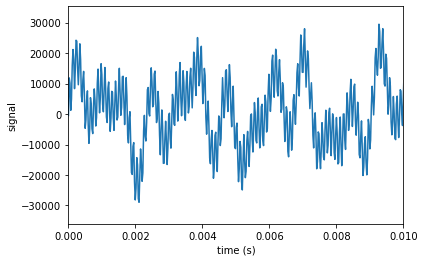

In [22]:
import matplotlib.pyplot as plt
plt.plot(t,signal)
plt.xlabel('time (s)')
plt.ylabel('signal')
plt.xlim(0,0.01)

## FFT

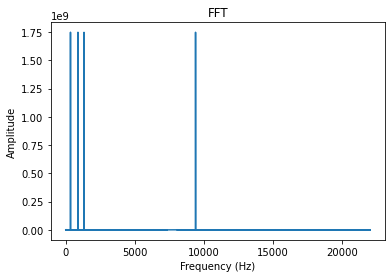

In [44]:
# Compute FFT
fft = np.fft.fft(signal)

# Compute frequencies corresponding to FFT and PSD
freqs = np.fft.fftfreq(len(signal), 1/sample_rate)
idx = np.argsort(freqs)

# Plot FFT
plt.plot(freqs[freqs>0], (np.abs(fft)[freqs>0]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT')
#plt.xlim(330,350)
plt.show()

## Power Spectral Density (PSD)

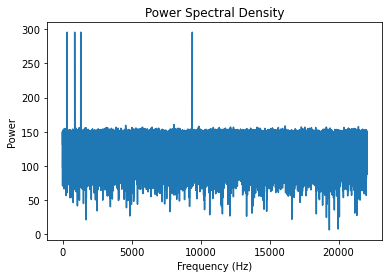

In [37]:
# Compute power spectral density
psd = np.abs(fft) ** 2 / len(signal)

# Plot PSD
plt.plot(freqs[freqs>0], 10*np.log(psd[freqs>0]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')

plt.title('Power Spectral Density')
plt.show()


## Spectrograms

 spectrogram is a visual representation of the frequency content of a signal as it varies with time. It is a 2D plot where the x-axis represents time, the y-axis represents frequency, and the color intensity or shading at each point.

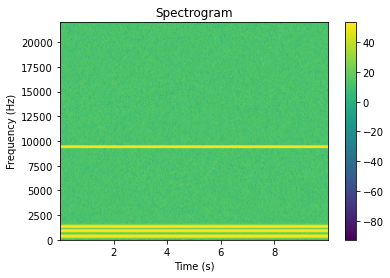

In [40]:
# Compute spectrogram
nperseg = int(sample_rate * 0.01)  # 100 ms window
noverlap = int(nperseg / 2)  # 50% overlap
plt.specgram(signal, Fs=sample_rate, NFFT=nperseg, noverlap=noverlap)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram')
plt.colorbar()
plt.show()

/tmp/ipykernel_76/1380906332.py:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(tt, ff, np.log10(Sxx))


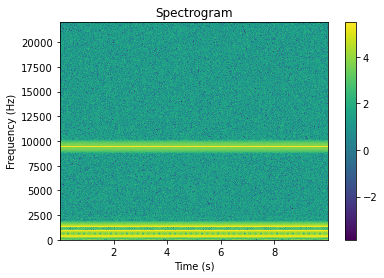

In [39]:
from scipy.signal import spectrogram
# Compute spectrogram
nperseg = int(sample_rate * 0.01)  # 100 ms window
noverlap = int(nperseg / 2)  # 50% overlap
ff, tt, Sxx = spectrogram(signal, fs=sample_rate, nperseg=nperseg, noverlap=noverlap)

# Plot spectrogram
plt.pcolormesh(tt, ff, np.log10(Sxx))
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram')
plt.colorbar()
plt.show()

## Filter Signal

In [41]:
from scipy.signal import butter, lfilter
# Filter parameters
low_freq = 500
high_freq = 1000
nyquist_freq = 0.5 * sample_rate
low = low_freq / nyquist_freq
high = high_freq / nyquist_freq

# Apply butterworth bandpass filter
b, a = butter(4, [low, high], btype='band')
filtered_signal = lfilter(b, a, signal)

# Scale to 16-bit integer range
filtered_signal *= 32767 / np.max(np.abs(filtered_signal))
filtered_signal = filtered_signal.astype(np.int16)

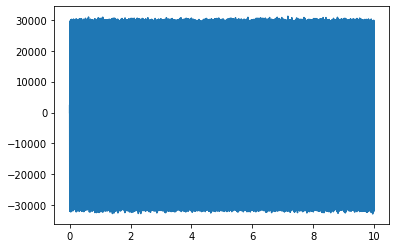

In [42]:
plt.plot(t,filtered_signal)

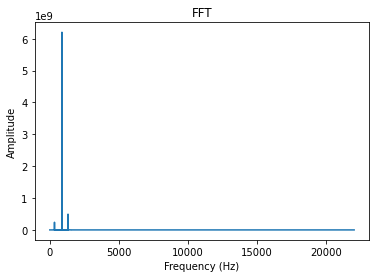

In [45]:
# Compute FFT
filtered_fft = np.fft.fft(filtered_signal)

# Compute frequencies corresponding to FFT and PSD
freqs = np.fft.fftfreq(len(filtered_signal), 1/sample_rate)
idx = np.argsort(freqs)

# Plot FFT
plt.plot(freqs[freqs>0], np.abs(filtered_fft)[freqs>0])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT')
plt.show()

/tmp/ipykernel_76/2446383592.py:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t, f, np.log10(Sxx))


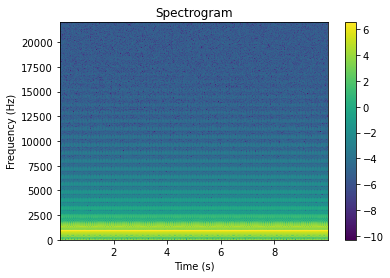

In [46]:
from scipy.signal import spectrogram
# Compute spectrogram
nperseg = int(sample_rate * 0.01)  # 100 ms window
noverlap = int(nperseg / 2)  # 50% overlap
f, t, Sxx = spectrogram(filtered_signal, fs=sample_rate, nperseg=nperseg, noverlap=noverlap)

# Plot spectrogram
plt.pcolormesh(t, f, np.log10(Sxx))
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram')
plt.colorbar()
plt.show()

# Read Audio Files

In [2]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np

def read_wav_file(file_path):
    sample_rate, audio_data = wavfile.read(file_path)
    return sample_rate, audio_data

# Usage example
file_path = 'speech.wav'
sample_rate, audio_data = read_wav_file(file_path)

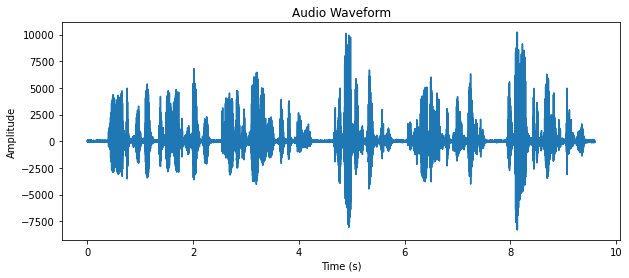

In [3]:
duration = len(audio_data) / sample_rate
# Create time array
time = np.linspace(0, duration, int(len(audio_data)), endpoint=False)


plt.figure(figsize=(10, 4))
plt.plot(time, audio_data)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Audio Waveform')
plt.show()

/tmp/ipykernel_57/2747216145.py:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t, f, np.log10(Sxx))


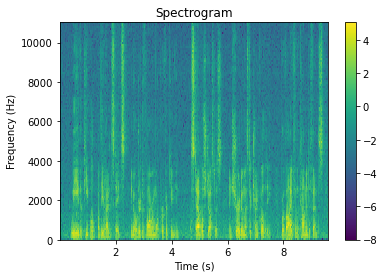

In [4]:
from scipy.signal import spectrogram
# Compute spectrogram
nperseg = int(sample_rate * 0.01)  # 100 ms window
noverlap = int(nperseg / 2)  # 50% overlap
f, t, Sxx = spectrogram(audio_data, fs=sample_rate, nperseg=nperseg, noverlap=noverlap)

# Plot spectrogram
plt.pcolormesh(t, f, np.log10(Sxx))
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram')
plt.colorbar()
plt.show()

In [5]:
from scipy.signal import butter, lfilter
# Filter parameters
low_freq = 2000
high_freq = 10000
nyquist_freq = 0.5 * sample_rate
low = low_freq / nyquist_freq
high = high_freq / nyquist_freq

# Apply butterworth bandpass filter
b, a = butter(4, [low, high], btype='band')
audio_data_filtered = lfilter(b, a, audio_data)


/tmp/ipykernel_57/4040844922.py:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t, f, np.log10(Sxx))


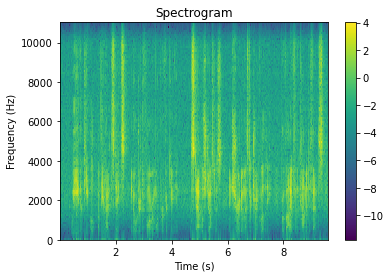

In [6]:
from scipy.signal import spectrogram
# Compute spectrogram
nperseg = int(sample_rate * 0.01)  # 100 ms window
noverlap = int(nperseg / 2)  # 50% overlap
f, t, Sxx = spectrogram(audio_data_filtered, fs=sample_rate, nperseg=nperseg, noverlap=noverlap)

# Plot spectrogram
plt.pcolormesh(t, f, np.log10(Sxx))
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram')
plt.colorbar()
plt.show()

In [7]:
wavfile.write('speech_filtered.wav',sample_rate, audio_data_filtered)

In [9]:
# Define the cutoff frequency and filter order
cutoff_freq = 4000  # Adjust this value as desired
filter_order = 4    # Adjust this value as desired

# Normalize the cutoff frequency based on the Nyquist rate
normalized_cutoff_freq = cutoff_freq / (sample_rate / 2)

# Design the low-pass filter
b, a = butter(filter_order, normalized_cutoff_freq, btype='low', analog=False)

# Apply the filter to the audio signal
filtered_audio_data = lfilter(b, a, audio_data)

/tmp/ipykernel_57/1985637973.py:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t, f, np.log10(Sxx))


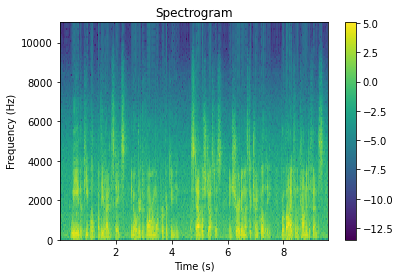

In [11]:
from scipy.signal import spectrogram
# Compute spectrogram
nperseg = int(sample_rate * 0.01)  # 100 ms window
noverlap = int(nperseg / 2)  # 50% overlap
f, t, Sxx = spectrogram(filtered_audio_data, fs=sample_rate, nperseg=nperseg, noverlap=noverlap)

# Plot spectrogram
plt.pcolormesh(t, f, np.log10(Sxx))
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram')
plt.colorbar()
plt.show()